In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive/PFA/shared/PFA/wlasl-processed

/content/drive/.shortcut-targets-by-id/16gMgbmqNvGL7_NDEhCQmSV5JdsLllzfh/PFA/wlasl-processed


In [ ]:
ls

 animation.gif
 features_df.csv
 LRCN_model_structure_plot.png
 missing.txt
 models/
 nslt_1000.json
 nslt_100.json
 nslt_2000.json
 nslt_300.json
 sample.mp4
 __temp__.mp4
 test_videos/
 test_videosbefore_test-Output-SeqLen20.mp4
'test_videoscomputer ASL-Output-SeqLen20.mp4'
 test_videosCOMPUTER-Output-SeqLen20.mp4
 test_videoscomputer_test-Output-SeqLen20.mp4
 test_videoshave_test-Output-SeqLen20.mp4
 test_videoshello_test-Output-SeqLen20.mp4
'test_videoswake-before funeral ASL-Output-SeqLen20.mp4'
 tmp/
 videos/
 WLASL_v0.3.json


### **<font style="color:#112B3C"> Import the Libraries</font>**

We will start by installing and importing the required libraries.

In [ ]:
!pip install ez_setup

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ez-setup: filename=ez_setup-0.9-py3-none-any.whl size=11015 sha256=f4878e65705bcd8757996de89ede4938165c9a21ff853d599f771b4b282e476e
  Stored in directory: /root/.cache/pip/wheels/f4/78/bd/f88c8eddfd5a8bf2a029e5cd8bc7a9914597002b081a000ffe
Successfully built ez-setup


In [ ]:
!pip install moviepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pafy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install youtube-dl==2020.12.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 33.0 MB/s 


In [ ]:
# import required libraries
import json
import os
import cv2
import pandas as pd
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy import *
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

In [ ]:
seed_constant = 42
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

 ### **<font style="color:#112B3C">Load WLAS Dataset</font>**

In [ ]:
cd /content/drive/MyDrive/PFA/shared/PFA/wlasl-processed

/content/drive/.shortcut-targets-by-id/16gMgbmqNvGL7_NDEhCQmSV5JdsLllzfh/PFA/wlasl-processed


In [ ]:
main_path = ''
wlas_df = pd.read_json(main_path + 'WLASL_v0.3.json')

In [ ]:
wlas_df.head()

,gloss,instances
0,book,"[{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra..."
1,drink,"[{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f..."
2,computer,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
3,before,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
4,chair,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."


In [ ]:
wlas_df.shape

(2000, 2)

### **<font style="color:#112B3C">Extract the available videos list from the dataset</font>**

In [ ]:
cd /content/drive/MyDrive/PFA/shared/PFA/wlasl-processed

/content/drive/.shortcut-targets-by-id/16gMgbmqNvGL7_NDEhCQmSV5JdsLllzfh/PFA/wlasl-processed


In [ ]:
ls

 animation.gif
 features_df.csv
 LRCN_model_structure_plot.png
 missing.txt
 models/
 nslt_1000.json
 nslt_100.json
 nslt_2000.json
 nslt_300.json
 sample.mp4
 __temp__.mp4
 test_videos/
 test_videosbefore_test-Output-SeqLen20.mp4
'test_videoscomputer ASL-Output-SeqLen20.mp4'
 test_videosCOMPUTER-Output-SeqLen20.mp4
 test_videoscomputer_test-Output-SeqLen20.mp4
 test_videoshave_test-Output-SeqLen20.mp4
 test_videoshello_test-Output-SeqLen20.mp4
'test_videoswake-before funeral ASL-Output-SeqLen20.mp4'
 tmp/
 videos/
 WLASL_v0.3.json


### **<font style="color:#112B3C">Extract the available videos list from the dataset</font>**

In [ ]:
def get_videos_ids(json_list):
    """
    function to check if the video id is available in the dataset
    and return the viedos ids of the current instance
    
    input: instance json list
    output: list of videos_ids
    
    """
    videos_list = []    
    for ins in json_list:
        video_id = ins['video_id']
        if os.path.exists(f'{main_path}videos/{video_id}.mp4'):
            videos_list.append(video_id)
    return videos_list

In [ ]:
def get_json_features(json_list):
    """
    function to check if the video id is available in the dataset
    and return the viedos ids and url or any other featrue of the current instance
    
    input: instance json list
    output: list of videos_ids
    
    """
    videos_ids = []
    videos_urls = []
    split_urls = []
    for ins in json_list:
        video_id = ins['video_id']
        video_url = ins['url']
        split = ins['split']
        if os.path.exists(f'{main_path}videos/{video_id}.mp4'):
            videos_ids.append(video_id)
            videos_urls.append(video_url)
            split_urls.append(split)
    return videos_ids, videos_urls, split_urls

In [ ]:
with open(main_path+'WLASL_v0.3.json', 'r') as data_file:
    json_data = data_file.read()

instance_json = json.loads(json_data)

In [ ]:
get_videos_ids(instance_json[0]['instances'])[0]

'07069'

In [ ]:
len(get_videos_ids(instance_json[0]['instances']))

5

In [ ]:
wlas_df['videos_ids'] = wlas_df['instances'].apply(get_videos_ids)

In [ ]:
features_df = pd.DataFrame(columns=['gloss', 'video_id', 'url', 'split'])
for row in wlas_df.iterrows():
#     print(row[1][1])
    ids, urls, split = get_json_features(row[1][1])
    word = [row[1][0]] * len(ids)
    df = pd.DataFrame(list(zip(word, ids, urls, split)), columns = features_df.columns)
    features_df = features_df.append(df, ignore_index=True)

In [ ]:

features_df.index.name = 'index'
features_df

,gloss,video_id,url,split
index,,,,
0,book,07069,https://signstock.blob.core.windows.net/signsc...,train
1,book,07068,https://s3-us-west-1.amazonaws.com/files.start...,train
2,book,07070,https://media.asldeafined.com/vocabulary/14666...,train
3,book,07099,http://www.aslsearch.com/signs/videos/book.mp4,val
4,book,07074,https://www.signingsavvy.com/signs/mp4/14/1432...,train
...,...,...,...,...
7286,propaganda,44962,https://www.signingsavvy.com/signs/mp4/9/9962.mp4,train
7287,proper,44970,https://media.spreadthesign.com/video/mp4/13/3...,val
7288,proper,44971,https://media.asldeafined.com/vocabulary/14687...,train


In [ ]:
# save to csv
#features_df.to_csv('features_df.csv', index=False)

In [ ]:
#features_df = pd.read_csv("features_df.csv")

In [ ]:
cd /content/drive/MyDrive/PFA/shared/PFA/wlasl-processed

/content/drive/.shortcut-targets-by-id/16gMgbmqNvGL7_NDEhCQmSV5JdsLllzfh/PFA/wlasl-processed


In [ ]:
ls

 animation.gif
 features_df.csv
 LRCN_model_structure_plot.png
 missing.txt
 models/
 nslt_1000.json
 nslt_100.json
 nslt_2000.json
 nslt_300.json
 sample.mp4
 __temp__.mp4
 test_videos/
 test_videosbefore_test-Output-SeqLen20.mp4
'test_videoscomputer ASL-Output-SeqLen20.mp4'
 test_videosCOMPUTER-Output-SeqLen20.mp4
 test_videoscomputer_test-Output-SeqLen20.mp4
 test_videoshave_test-Output-SeqLen20.mp4
 test_videoshello_test-Output-SeqLen20.mp4
'test_videoswake-before funeral ASL-Output-SeqLen20.mp4'
 tmp/
 videos/
 WLASL_v0.3.json


In [ ]:
features_df.index.name = 'index'
features_df

,gloss,video_id,url,split
index,,,,
0,book,07069,https://signstock.blob.core.windows.net/signsc...,train
1,book,07068,https://s3-us-west-1.amazonaws.com/files.start...,train
2,book,07070,https://media.asldeafined.com/vocabulary/14666...,train
3,book,07099,http://www.aslsearch.com/signs/videos/book.mp4,val
4,book,07074,https://www.signingsavvy.com/signs/mp4/14/1432...,train
...,...,...,...,...
7286,propaganda,44962,https://www.signingsavvy.com/signs/mp4/9/9962.mp4,train
7287,proper,44970,https://media.spreadthesign.com/video/mp4/13/3...,val
7288,proper,44971,https://media.asldeafined.com/vocabulary/14687...,train


In [ ]:
features_df[features_df['gloss'] == "computer"]

,gloss,video_id,url,split
index,,,,
17,computer,12328,https://www.signingsavvy.com/signs/mp4/6/6326.mp4,train
18,computer,12312,https://s3-us-west-1.amazonaws.com/files.start...,val
19,computer,12311,https://media.spreadthesign.com/video/mp4/13/5...,train
20,computer,12338,http://www.aslsearch.com/signs/videos/computer...,train
21,computer,12313,https://s3-us-west-1.amazonaws.com/files.start...,train
22,computer,12314,https://signstock.blob.core.windows.net/signsc...,train
23,computer,12315,https://signstock.blob.core.windows.net/signsc...,val
24,computer,12316,https://signstock.blob.core.windows.net/signsc...,train
25,computer,12317,https://signstock.blob.core.windows.net/signsc...,train


### **<font style="color:#205375">Visualize the Data with its Labels</font>**

In [ ]:
features_df

,gloss,video_id,url,split
index,,,,
0,book,07069,https://signstock.blob.core.windows.net/signsc...,train
1,book,07068,https://s3-us-west-1.amazonaws.com/files.start...,train
2,book,07070,https://media.asldeafined.com/vocabulary/14666...,train
3,book,07099,http://www.aslsearch.com/signs/videos/book.mp4,val
4,book,07074,https://www.signingsavvy.com/signs/mp4/14/1432...,train
...,...,...,...,...
7286,propaganda,44962,https://www.signingsavvy.com/signs/mp4/9/9962.mp4,train
7287,proper,44970,https://media.spreadthesign.com/video/mp4/13/3...,val
7288,proper,44971,https://media.asldeafined.com/vocabulary/14687...,train


In [ ]:
def get_N(n):
  return n, list(features_df.gloss.value_counts().head(n).index)
#N = 4
#TOP_N_CLASSES = list(features_df.gloss.value_counts().head(N).index)
N, TOP_N_CLASSES = get_N(4)

In [ ]:
TOP_N_CLASSES

['before', 'computer', 'cool', 'go']

In [ ]:
# get all categories classes
all_classes = features_df.gloss.value_counts().keys().to_list()
all_classes

['before',
 'computer',
 'cool',
 'go',
 'cousin',
 'accident',
 'drink',
 'change',
 'cold',
 'delay',
 'last',
 'bowling',
 'bar',
 'later',
 'check',
 'laugh',
 'bed',
 'letter',
 'play',
 'call',
 'pizza',
 'far',
 'champion',
 'help',
 'leave',
 'candy',
 'deaf',
 'interest',
 'hear',
 'basketball',
 'fault',
 'environment',
 'full',
 'move',
 'near',
 'government',
 'ago',
 'daughter',
 'brother',
 'past',
 'cry',
 'argue',
 'delicious',
 'balance',
 'perspective',
 'lose',
 'appointment',
 'give',
 'fat',
 'make',
 'outside',
 'dark',
 'corn',
 'hot',
 'like',
 'graduate',
 'many',
 'fine',
 'family',
 'no',
 'form',
 'onion',
 'necklace',
 'her',
 'australia',
 'list',
 'california',
 'happy',
 'mother',
 'point',
 'good',
 'alone',
 'postpone',
 'humble',
 'example',
 'now',
 'problem',
 'grammar',
 'approve',
 'improve',
 'heart',
 'child',
 'party',
 'choose',
 'crash',
 'country',
 'convince',
 'close',
 'practice',
 'president',
 'jealous',
 'chat',
 'order',
 'expensive',

In [ ]:
classes_dict = {}
for i in range(len(all_classes)):
    classes_dict[all_classes[i]] = i

classes_dict

{'before': 0,
 'computer': 1,
 'cool': 2,
 'go': 3,
 'cousin': 4,
 'accident': 5,
 'drink': 6,
 'change': 7,
 'cold': 8,
 'delay': 9,
 'last': 10,
 'bowling': 11,
 'bar': 12,
 'later': 13,
 'check': 14,
 'laugh': 15,
 'bed': 16,
 'letter': 17,
 'play': 18,
 'call': 19,
 'pizza': 20,
 'far': 21,
 'champion': 22,
 'help': 23,
 'leave': 24,
 'candy': 25,
 'deaf': 26,
 'interest': 27,
 'hear': 28,
 'basketball': 29,
 'fault': 30,
 'environment': 31,
 'full': 32,
 'move': 33,
 'near': 34,
 'government': 35,
 'ago': 36,
 'daughter': 37,
 'brother': 38,
 'past': 39,
 'cry': 40,
 'argue': 41,
 'delicious': 42,
 'balance': 43,
 'perspective': 44,
 'lose': 45,
 'appointment': 46,
 'give': 47,
 'fat': 48,
 'make': 49,
 'outside': 50,
 'dark': 51,
 'corn': 52,
 'hot': 53,
 'like': 54,
 'graduate': 55,
 'many': 56,
 'fine': 57,
 'family': 58,
 'no': 59,
 'form': 60,
 'onion': 61,
 'necklace': 62,
 'her': 63,
 'australia': 64,
 'list': 65,
 'california': 66,
 'happy': 67,
 'mother': 68,
 'point': 69

In [ ]:
features_df['gloss_indx'] = features_df.gloss.map(classes_dict)

In [ ]:
features_df

,gloss,video_id,url,split,gloss_indx
index,,,,,
0,book,07069,https://signstock.blob.core.windows.net/signsc...,train,727
1,book,07068,https://s3-us-west-1.amazonaws.com/files.start...,train,727
2,book,07070,https://media.asldeafined.com/vocabulary/14666...,train,727
3,book,07099,http://www.aslsearch.com/signs/videos/book.mp4,val,727
4,book,07074,https://www.signingsavvy.com/signs/mp4/14/1432...,train,727
...,...,...,...,...,...
7286,propaganda,44962,https://www.signingsavvy.com/signs/mp4/9/9962.mp4,train,1349
7287,proper,44970,https://media.spreadthesign.com/video/mp4/13/3...,val,1171
7288,proper,44971,https://media.asldeafined.com/vocabulary/14687...,train,1171


> *let's initialize some constants*

In [ ]:
ls

 animation.gif
 features_df.csv
 LRCN_model_structure_plot.png
 missing.txt
 models/
 nslt_1000.json
 nslt_100.json
 nslt_2000.json
 nslt_300.json
 sample.mp4
 __temp__.mp4
 test_videos/
 test_videosbefore_test-Output-SeqLen20.mp4
'test_videoscomputer ASL-Output-SeqLen20.mp4'
 test_videosCOMPUTER-Output-SeqLen20.mp4
 test_videoscomputer_test-Output-SeqLen20.mp4
 test_videoshave_test-Output-SeqLen20.mp4
 test_videoshello_test-Output-SeqLen20.mp4
'test_videoswake-before funeral ASL-Output-SeqLen20.mp4'
 tmp/
 videos/
 WLASL_v0.3.json


In [ ]:
# Specify the hight and width each video frame will be resized in our dataset.
IMAGE_HEIGHT, IMAGE_WIDTH = 64, 64

# Specify the number of frames of a video that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 20

# Specify the directory containing the dataset.
DATASET_DIR = "videos/"

# Specify the list containing the names of the classes used for training.
CLASSES_LIST = all_classes

**Note:** *The **`IMAGE_HEIGHT`**, **`IMAGE_WIDTH`** and **`SEQUENCE_LENGTH`** constants can be increased for better results, although increasing the sequence length is only effective to a certain point, and increasing the values will result in the process being more computationally expensive.*

In [ ]:
def get_index_of_video(vd_id):
    i = 0
    for item in features_df["video_id"]:
        if item == vd_id:
            break
        i = i+1
    return i

In [ ]:
def get_index_of_video(vd_id):
  return features_df['video_id'].loc[lambda x: x==vd_id].index[0]

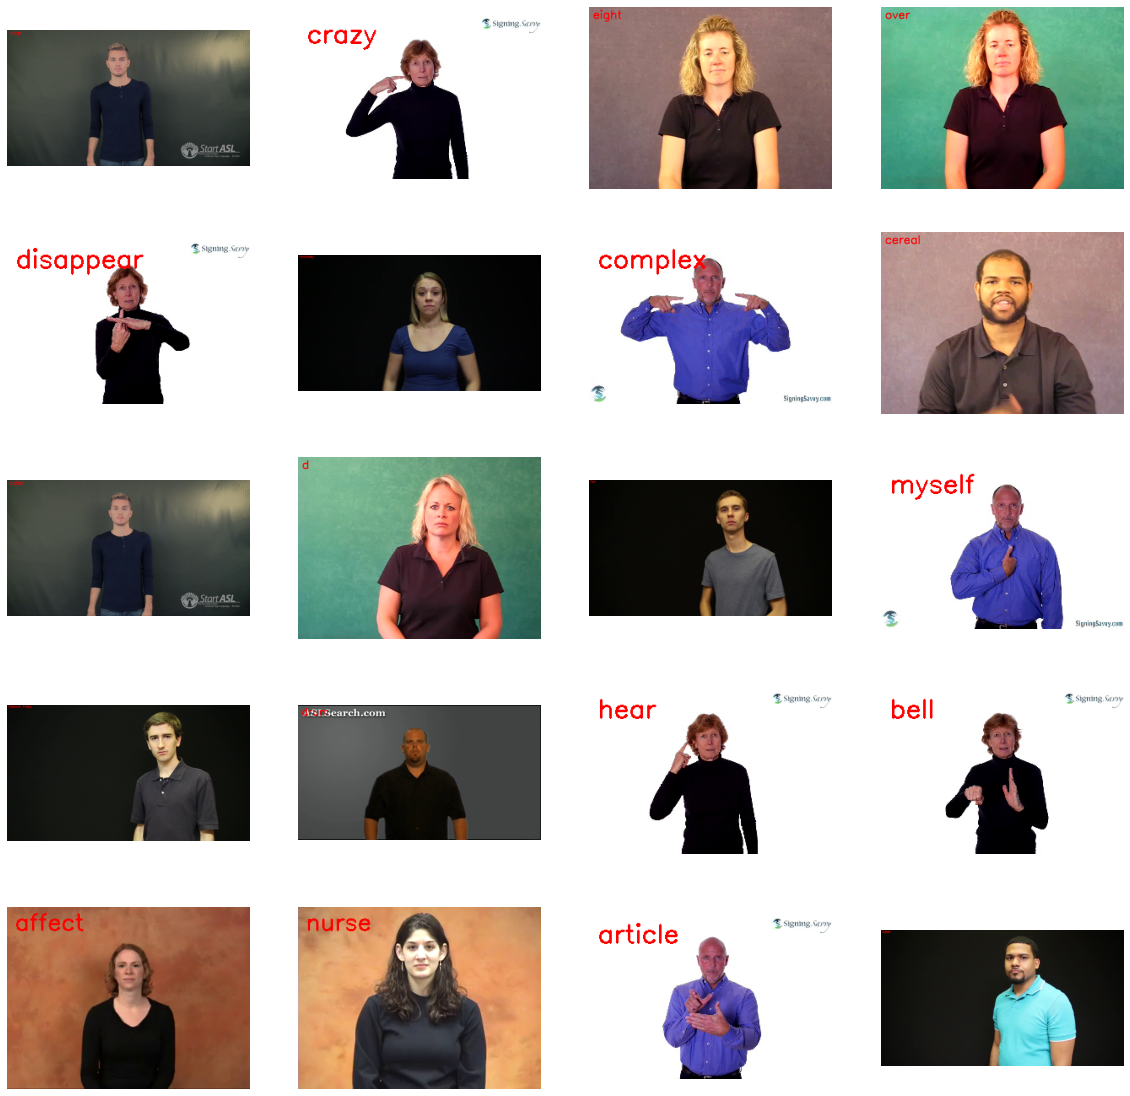

In [ ]:
# Create a Matplotlib figure and specify the size of the figure
plt.figure(figsize=(20, 20))

# Get the names of all classes/categories in UCF50
all_classes_names = os.listdir(DATASET_DIR)

# generate a list of 20 random values. The values will be between 0-50 where 50 is the
# total number of classes in the dataset
random_range = random.sample(range(len(all_classes_names)), 20)

# Iterating through all the generated random values.
for counter, random_index in enumerate(random_range, 1):

    # Retrieve the list of all the video files present in the randomly selected Class Directory
    video_files_names_list = os.listdir(DATASET_DIR)

    #Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file_name = random.choice(video_files_names_list)
    
    # Retrieve a Class Name using the Random Index.
    idx = get_index_of_video(selected_video_file_name.split(".")[0])
    selected_class_Name = features_df.iloc[idx].gloss

    # Initialize a VideoCapture object to read from the video File.
    video_reader = cv2.VideoCapture(f'{DATASET_DIR}{selected_video_file_name}')

    # Read the first frame of the video file
    _, bgr_frame = video_reader.read()

    # release the video object
    video_reader.release()

    #  convert the frame from VGR into RBG format.
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Write the class name on the video frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    # Display the frame
    plt.subplot(5, 4, counter); plt.imshow(rgb_frame);plt.axis('off')
   


## **<font style="color:#112B3C">Preprocess the Dataset</font>**

Next, we will perform some preprocessing on the dataset. First, we will read the video files from the dataset and resize the frames of the videos to a fixed width and height, to reduce the computations and normalized the data to range `[0-1]` by dividing the pixel values with `255`, which makes convergence faster while training the network.

### **<font style="color:#205375">Create a Function to Extract, Resize & Normalize Frames</font>**

We will create a function **`frames_extraction()`** that will create a list containing the resized and normalized frames of a video whose path is passed to it as an argument. The function will read the video file frame by frame, although not all frames are added to the list as we will only need an evenly distributed sequence length of frames. 

In [ ]:
def frames_extraction(video_path):
    """
    This function will extract the required frames from a video after resizing and normalizing them.
    Args:
    video_path: The path of the video in the disk, whose frames are to be extracted.

    Returns:
    frames_list: A list containing the resized and normalized frames of the video.
    """

    # Declare a list to store video frames.
    frames_list = []

    # Read the video File using the videoCapture object.
    video_reader = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)
    
    # Iterate through the Video frames:
    for frame_counter in range(SEQUENCE_LENGTH):

        # Set the current frame position of the video
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading the frame from the video.
        success, frame = video_reader.read()

        # check if the video frame is not successfully read the break the loop
        if not success:
            break

        # Resize the Frame to fixed height and width.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))

        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies wetween 0 and 1
        normalized_frame = resized_frame / 255 

        # Append the normalized frame into the frames list
        frames_list.append(normalized_frame)

    # Release the VideoCapture object.
    video_reader.release()

    # return the frames list.
    return frames_list


### **<font style="color:#205375">Create a Function for Dataset Creation</font>**

Now we will create a function **`create_dataset()`** that will iterate through all the video located in the **`DATASET_DIR`** constant and will call the function  **`frame_extraction()`** on every video file and return the frames (**`features`**), class index ( **`labels`**), and video file path (**`video_files_paths`**).

In [ ]:
N, TOP_N_CLASSES = get_N(4)

In [ ]:
def create_dataset():
    """
    This function will extract the data of the videos and create the required dataset.
    Retuns:
    features: A list containing the extracted frames of the videos.
    labels :  A list containing the indexes of the classes associated with the video
    video_files_paths :  A list containing the paths of the videos in the disk.
    """

    # Declared Empty Lists to store the features, labels and video file path values.
    features = []
    labels = []
    video_files_paths = []
    split = []
       

    # Get the list of video files present in the specific class name directory.
    files_list = os.listdir(DATASET_DIR)
    count = 0
    for file_name in files_list:

        # Display the name of the video whose data is being extracted and its number in iterations
        

        # Get the complete video path.
        video_file_path = os.path.join(DATASET_DIR, file_name)
        idx = get_index_of_video(file_name.split(".")[0])
        selected_class_Name = features_df.iloc[idx].gloss
        
        if selected_class_Name in TOP_N_CLASSES:
          print(f"Extracting Data of file: {file_name}, number: {count}")
          
          # Extract the frames of the video file.
          frames = frames_extraction(video_file_path)
          #frames = load_rgb_frames_from_video(DATASET_DIR, file_name, 1, SEQUENCE_LENGTH)

          # check if the extracted frames are equal to the SEQUENCE_LENGTH specified above.
          # So ignore the videos having less than the SEQUENCE_LENGTH.
          if len(frames) == SEQUENCE_LENGTH:

              # get the video's class name
              class_index = features_df.iloc[idx].gloss_indx
              splt = features_df.iloc[idx].split
              # Append the data to their repective list
              features.append(frames)
              labels.append(class_index)
              video_files_paths.append(video_file_path)
              split.append(splt)
              count = count +1
              

    # Converting the list to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)
    split = np.asarray(split)

    # Return the frames, class_index and video_file_path
    return features, labels, split

Now we will utilize the function **`create_dataset()`** created above to extract the data and create the required dataset.

In [ ]:
# Creat the dataset
features, labels, split = create_dataset()

Extracting Data of file: 24940.mp4, number: 0
Extracting Data of file: 24973.mp4, number: 1
Extracting Data of file: 24956.mp4, number: 2
Extracting Data of file: 24946.mp4, number: 3
Extracting Data of file: 24955.mp4, number: 4
Extracting Data of file: 24952.mp4, number: 5
Extracting Data of file: 24943.mp4, number: 6
Extracting Data of file: 24962.mp4, number: 7
Extracting Data of file: 24947.mp4, number: 8
Extracting Data of file: 24961.mp4, number: 9
Extracting Data of file: 24960.mp4, number: 10
Extracting Data of file: 24941.mp4, number: 11
Extracting Data of file: 24954.mp4, number: 12
Extracting Data of file: 13196.mp4, number: 13
Extracting Data of file: 13203.mp4, number: 14
Extracting Data of file: 13198.mp4, number: 15
Extracting Data of file: 13197.mp4, number: 16
Extracting Data of file: 12317.mp4, number: 17
Extracting Data of file: 12338.mp4, number: 18
Extracting Data of file: 12318.mp4, number: 19
Extracting Data of file: 12328.mp4, number: 20
Extracting Data of file

## **<font style="color:#112B3C">Split the Data into Train and Test Set</font>**

As of now, we have the required **`features`** (a NumPy array containing all the extracted frames of the videos) and **`one_hot_encoded_labels`** (also a Numpy array containing all class labels in one hot encoded format). So now, we will split our data to create training and testing sets. We will also shuffle the dataset before the split to avoid any bias and get splits representing the overall distribution of the data.

In [ ]:
train_data = []
train_labels = []
test_data = []
test_labels = []
for i in range(len(split)):
  if split[i]=="train":
    train_data.append(features[i])
    train_labels.append(labels[i])
  else:
    test_data.append(features[i])
    test_labels.append(labels[i])

train_data = np.asarray(train_data)
train_labels = np.array(train_labels)

test_data = np.asarray(test_data)
test_labels = np.array(test_labels)

In [ ]:
NB_CLASSES = len(set(train_labels))
NB_CLASSES

4

In [ ]:
train_data.shape

(40, 20, 64, 64, 3)

In [ ]:
# We will use a Sequential model for model_3 construction.
LRCN_model_3 = Sequential()

# Define the Model Architecture.
########################################################################################################################

LRCN_model_3.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'tanh'),
                          input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

LRCN_model_3.add(TimeDistributed(MaxPooling2D((4, 4)))) 
LRCN_model_3.add(TimeDistributed(Dropout(0.25)))

LRCN_model_3.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'tanh')))
LRCN_model_3.add(TimeDistributed(MaxPooling2D((4, 4))))
LRCN_model_3.add(TimeDistributed(Dropout(0.25)))

LRCN_model_3.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'tanh')))
LRCN_model_3.add(TimeDistributed(MaxPooling2D((2, 2))))
LRCN_model_3.add(TimeDistributed(Dropout(0.25)))

LRCN_model_3.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'tanh')))
LRCN_model_3.add(TimeDistributed(MaxPooling2D((2, 2))))
#model.add(TimeDistributed(Dropout(0.25)))
                                  
LRCN_model_3.add(TimeDistributed(Flatten()))
                                  
LRCN_model_3.add(LSTM(32))
                                  
LRCN_model_3.add(Dense(NB_CLASSES, activation = 'softmax'))

########################################################################################################################

# Display the models summary.
LRCN_model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 20, 64, 64, 16)   448       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 20, 16, 16, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 20, 16, 16, 16)   0         
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 20, 16, 16, 32)   4640      
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 20, 4, 4, 32)     0

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
 
# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model_3.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
LRCN_model_3_history = LRCN_model_3.fit(x = test_data, y = to_categorical(test_labels), epochs = 70, batch_size = 4 ,
                                            validation_data=(test_data, tf.one_hot(test_labels, NB_CLASSES)), callbacks = [early_stopping_callback])

Epoch 1/70
4/4 [==============================] - 15s 279ms/step - loss: 1.5592 - accuracy: 0.0667 - val_loss: 1.4068 - val_accuracy: 0.2667
Epoch 2/70
4/4 [==============================] - 0s 25ms/step - loss: 1.4006 - accuracy: 0.2667 - val_loss: 1.3716 - val_accuracy: 0.2000
Epoch 3/70
4/4 [==============================] - 0s 23ms/step - loss: 1.3785 - accuracy: 0.2667 - val_loss: 1.3522 - val_accuracy: 0.2667
Epoch 4/70
4/4 [==============================] - 0s 24ms/step - loss: 1.3465 - accuracy: 0.2667 - val_loss: 1.3307 - val_accuracy: 0.4667
Epoch 5/70
4/4 [==============================] - 0s 24ms/step - loss: 1.3092 - accuracy: 0.4667 - val_loss: 1.3041 - val_accuracy: 0.4667
Epoch 6/70
4/4 [==============================] - 0s 25ms/step - loss: 1.2939 - accuracy: 0.4667 - val_loss: 1.2746 - val_accuracy: 0.4667
Epoch 7/70
4/4 [==============================] - 0s 23ms/step - loss: 1.2659 - accuracy: 0.4667 - val_loss: 1.2353 - val_accuracy: 0.4667
Epoch 8/70
4/4 [=========

best model Model 3

In [ ]:
LRCN_model_3_evaluation_history = LRCN_model_3.evaluate(test_data, to_categorical(test_labels))

1/1 [==============================] - 0s 252ms/step - loss: 0.2124 - accuracy: 0.9333


In [ ]:
LRCN_model_3.evaluate(test_data, to_categorical(test_labels))

1/1 [==============================] - 0s 33ms/step - loss: 0.2124 - accuracy: 0.9333


[0.21240679919719696, 0.9333333373069763]

In [ ]:
ConvLSTM_model_3 = Sequential()

# Define the Model Architecture.
########################################################################################################################

ConvLSTM_model_3.add(ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = "tanh", use_bias=True,
                    recurrent_dropout=0.4, return_sequences=True, input_shape = (SEQUENCE_LENGTH,
                                                                                IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

ConvLSTM_model_3.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_first'))
ConvLSTM_model_3.add(TimeDistributed(Dropout(0.2)))

#model.add(TimeDistributed(Dropout(0.2)))

ConvLSTM_model_3.add(Flatten()) 

ConvLSTM_model_3.add(Dense(NB_CLASSES, activation = "softmax"))

########################################################################################################################

# Display the models summary.
ConvLSTM_model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 20, 62, 62, 4)     1024      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 20, 62, 31, 2)    0         
 )                                                               
                                                                 
 time_distributed_12 (TimeDi  (None, 20, 62, 31, 2)    0         
 stributed)                                                      
                                                                 
 flatten_1 (Flatten)         (None, 76880)             0         
                                                                 
 dense_1 (Dense)             (None, 4)                 307524    
                                                                 
Total params: 308,548
Trainable params: 308,548
Non-tr

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'auto', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics values to the model
ConvLSTM_model_3.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
ConvLSTM_model_3_history = ConvLSTM_model_3.fit(x = train_data, y = tf.one_hot(train_labels, NB_CLASSES), epochs = 70, batch_size = 20,
                                                     validation_data=(test_data, tf.one_hot(test_labels, NB_CLASSES)))

Epoch 1/70
2/2 [==============================] - 5s 767ms/step - loss: 0.1163 - accuracy: 0.9750 - val_loss: 2.7973 - val_accuracy: 0.5333
Epoch 2/70
2/2 [==============================] - 0s 200ms/step - loss: 0.3131 - accuracy: 0.9500 - val_loss: 2.4104 - val_accuracy: 0.5333
Epoch 3/70
2/2 [==============================] - 0s 179ms/step - loss: 0.1999 - accuracy: 0.9250 - val_loss: 2.2953 - val_accuracy: 0.4667
Epoch 4/70
2/2 [==============================] - 0s 135ms/step - loss: 0.1700 - accuracy: 0.9750 - val_loss: 2.3181 - val_accuracy: 0.5333
Epoch 5/70
2/2 [==============================] - 0s 145ms/step - loss: 0.0943 - accuracy: 1.0000 - val_loss: 2.3074 - val_accuracy: 0.5333
Epoch 6/70
2/2 [==============================] - 0s 134ms/step - loss: 0.0984 - accuracy: 0.9500 - val_loss: 1.9562 - val_accuracy: 0.4667
Epoch 7/70
2/2 [==============================] - 0s 134ms/step - loss: 0.0464 - accuracy: 1.0000 - val_loss: 1.7682 - val_accuracy: 0.4000
Epoch 8/70
2/2 [====

In [ ]:
ConvLSTM_model_3.evaluate(test_data, to_categorical(test_labels))

1/1 [==============================] - 0s 42ms/step - loss: 2.1419 - accuracy: 0.4667


[2.1419103145599365, 0.46666666865348816]

In [ ]:
CNN_model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv3D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(SEQUENCE_LENGTH,IMAGE_HEIGHT, IMAGE_WIDTH, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.MaxPool3D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv3D(filters=10, 
                         kernel_size=3, 
                         activation="relu"
                         ),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(NB_CLASSES, activation="softmax") # binary activation output
])
CNN_model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_4 (Conv3D)           (None, 18, 62, 62, 10)    820       
                                                                 
 max_pooling3d_3 (MaxPooling  (None, 9, 31, 31, 10)    0         
 3D)                                                             
                                                                 
 conv3d_5 (Conv3D)           (None, 7, 29, 29, 10)     2710      
                                                                 
 flatten_4 (Flatten)         (None, 58870)             0         
                                                                 
 dense_4 (Dense)             (None, 4)                 235484    
                                                                 
Total params: 239,014
Trainable params: 239,014
Non-trainable params: 0
________________________________________________

In [ ]:
# Compile the model
CNN_model_1.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
# Fit the model
CNN_model_history_1 = CNN_model_1.fit(train_data,
                        train_labels,
                        epochs=70,
                        steps_per_epoch=len(train_data),
                        validation_data=(test_data, test_labels),
                        validation_steps=len(test_data))

Epoch 1/70
40/40 [==============================] - 1s 9ms/step - loss: 1.5619 - accuracy: 0.1750 - val_loss: 1.3857 - val_accuracy: 0.2667
Epoch 2/70
40/40 [==============================] - 0s 5ms/step - loss: 1.3998 - accuracy: 0.5750 - val_loss: 1.4833 - val_accuracy: 0.2667
Epoch 3/70
40/40 [==============================] - 0s 6ms/step - loss: 1.0387 - accuracy: 0.7000 - val_loss: 1.3775 - val_accuracy: 0.4000
Epoch 4/70
40/40 [==============================] - 0s 5ms/step - loss: 0.4111 - accuracy: 0.8750 - val_loss: 1.2460 - val_accuracy: 0.4667
Epoch 5/70
40/40 [==============================] - 0s 5ms/step - loss: 0.1621 - accuracy: 0.9500 - val_loss: 1.6767 - val_accuracy: 0.4000
Epoch 6/70
40/40 [==============================] - 0s 6ms/step - loss: 0.1162 - accuracy: 0.9750 - val_loss: 2.4132 - val_accuracy: 0.4000
Epoch 7/70
40/40 [==============================] - 0s 6ms/step - loss: 0.0388 - accuracy: 1.0000 - val_loss: 2.1242 - val_accuracy: 0.3333
Epoch 8/70
40/40 [==

In [ ]:
CNN_model_1.evaluate(test_data, test_labels)

1/1 [==============================] - 0s 123ms/step - loss: 3.4125 - accuracy: 0.3333


[3.4125475883483887, 0.3333333432674408]

---------------

## TOP 10

In [ ]:
N, TOP_N_CLASSES = get_N(10)

In [ ]:
# Creat the dataset
features, labels, split = create_dataset()

Extracting Data of file: 24940.mp4, number: 0
Extracting Data of file: 24973.mp4, number: 1
Extracting Data of file: 24956.mp4, number: 2
Extracting Data of file: 24946.mp4, number: 3
Extracting Data of file: 24955.mp4, number: 4
Extracting Data of file: 24952.mp4, number: 5
Extracting Data of file: 24943.mp4, number: 6
Extracting Data of file: 24962.mp4, number: 7
Extracting Data of file: 24947.mp4, number: 8
Extracting Data of file: 24961.mp4, number: 9
Extracting Data of file: 24960.mp4, number: 10
Extracting Data of file: 24941.mp4, number: 11
Extracting Data of file: 24954.mp4, number: 12
Extracting Data of file: 13196.mp4, number: 13
Extracting Data of file: 13203.mp4, number: 14
Extracting Data of file: 13198.mp4, number: 15
Extracting Data of file: 13197.mp4, number: 16
Extracting Data of file: 13647.mp4, number: 17
Extracting Data of file: 13640.mp4, number: 18
Extracting Data of file: 13642.mp4, number: 19
Extracting Data of file: 13634.mp4, number: 20
Extracting Data of file

## **<font style="color:#112B3C">Split the Data into Train and Test Set</font>**

As of now, we have the required **`features`** (a NumPy array containing all the extracted frames of the videos) and **`one_hot_encoded_labels`** (also a Numpy array containing all class labels in one hot encoded format). So now, we will split our data to create training and testing sets. We will also shuffle the dataset before the split to avoid any bias and get splits representing the overall distribution of the data.

In [ ]:
train_data = []
train_labels = []
test_data = []
test_labels = []
for i in range(len(split)):
  if split[i]=="train":
    train_data.append(features[i])
    train_labels.append(labels[i])
  else:
    test_data.append(features[i])
    test_labels.append(labels[i])

train_data = np.asarray(train_data)
train_labels = np.array(train_labels)

test_data = np.asarray(test_data)
test_labels = np.array(test_labels)

In [ ]:
NB_CLASSES = len(set(train_labels))
NB_CLASSES

10

In [ ]:
len(train_data), len(test_data)

(88, 36)

In [ ]:
# We will use a Sequential model for model_3 construction.
LRCN_model_3 = Sequential()

# Define the Model Architecture.
########################################################################################################################

LRCN_model_3.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'tanh'),
                          input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

LRCN_model_3.add(TimeDistributed(MaxPooling2D((4, 4)))) 
LRCN_model_3.add(TimeDistributed(Dropout(0.25)))

LRCN_model_3.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'tanh')))
LRCN_model_3.add(TimeDistributed(MaxPooling2D((4, 4))))
LRCN_model_3.add(TimeDistributed(Dropout(0.25)))

LRCN_model_3.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'tanh')))
LRCN_model_3.add(TimeDistributed(MaxPooling2D((2, 2))))
LRCN_model_3.add(TimeDistributed(Dropout(0.25)))

LRCN_model_3.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'tanh')))
LRCN_model_3.add(TimeDistributed(MaxPooling2D((2, 2))))
#model.add(TimeDistributed(Dropout(0.25)))
                                  
LRCN_model_3.add(TimeDistributed(Flatten()))
                                  
LRCN_model_3.add(LSTM(32))
                                  
LRCN_model_3.add(Dense(NB_CLASSES, activation = 'softmax'))

########################################################################################################################

# Display the models summary.
LRCN_model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_13 (TimeDi  (None, 20, 64, 64, 16)   448       
 stributed)                                                      
                                                                 
 time_distributed_14 (TimeDi  (None, 20, 16, 16, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_15 (TimeDi  (None, 20, 16, 16, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_16 (TimeDi  (None, 20, 16, 16, 32)   4640      
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 20, 4, 4, 32)    

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
 
# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model_3.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
LRCN_model_3_history = LRCN_model_3.fit(x = test_data, y = to_categorical(test_labels), epochs = 70, batch_size = 4 ,
                                            validation_data=(test_data, tf.one_hot(test_labels, NB_CLASSES)), callbacks = [early_stopping_callback])

Epoch 1/70
9/9 [==============================] - 2s 91ms/step - loss: 2.4424 - accuracy: 0.0000e+00 - val_loss: 2.2873 - val_accuracy: 0.1389
Epoch 2/70
9/9 [==============================] - 0s 21ms/step - loss: 2.3114 - accuracy: 0.1111 - val_loss: 2.2760 - val_accuracy: 0.1667
Epoch 3/70
9/9 [==============================] - 0s 21ms/step - loss: 2.2921 - accuracy: 0.1667 - val_loss: 2.2693 - val_accuracy: 0.2222
Epoch 4/70
9/9 [==============================] - 0s 20ms/step - loss: 2.2679 - accuracy: 0.1944 - val_loss: 2.2444 - val_accuracy: 0.2500
Epoch 5/70
9/9 [==============================] - 0s 20ms/step - loss: 2.2511 - accuracy: 0.1389 - val_loss: 2.2107 - val_accuracy: 0.2500
Epoch 6/70
9/9 [==============================] - 0s 20ms/step - loss: 2.2202 - accuracy: 0.2778 - val_loss: 2.1694 - val_accuracy: 0.2500
Epoch 7/70
9/9 [==============================] - 0s 21ms/step - loss: 2.1816 - accuracy: 0.2500 - val_loss: 2.1175 - val_accuracy: 0.2778
Epoch 8/70
9/9 [=======

best model Model 3

In [ ]:
LRCN_model_3_evaluation_history = LRCN_model_3.evaluate(test_data, to_categorical(test_labels))

2/2 [==============================] - 1s 10ms/step - loss: 0.7246 - accuracy: 0.7222


In [ ]:
LRCN_model_3.evaluate(test_data, to_categorical(test_labels))

2/2 [==============================] - 0s 10ms/step - loss: 0.7246 - accuracy: 0.7222


[0.7246492505073547, 0.7222222089767456]

In [ ]:
ConvLSTM_model_3 = Sequential()

# Define the Model Architecture.
########################################################################################################################

ConvLSTM_model_3.add(ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = "tanh", use_bias=True,
                    recurrent_dropout=0.4, return_sequences=True, input_shape = (SEQUENCE_LENGTH,
                                                                                IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

ConvLSTM_model_3.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_first'))
ConvLSTM_model_3.add(TimeDistributed(Dropout(0.2)))

#model.add(TimeDistributed(Dropout(0.2)))

ConvLSTM_model_3.add(Flatten()) 

ConvLSTM_model_3.add(Dense(NB_CLASSES, activation = "softmax"))

########################################################################################################################

# Display the models summary.
ConvLSTM_model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_1 (ConvLSTM2D)  (None, 20, 62, 62, 4)     1024      
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 20, 62, 31, 2)    0         
 3D)                                                             
                                                                 
 time_distributed_25 (TimeDi  (None, 20, 62, 31, 2)    0         
 stributed)                                                      
                                                                 
 flatten_6 (Flatten)         (None, 76880)             0         
                                                                 
 dense_6 (Dense)             (None, 10)                768810    
                                                                 
Total params: 769,834
Trainable params: 769,834
Non-tr

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'auto', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics values to the model
ConvLSTM_model_3.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
ConvLSTM_model_3_history = ConvLSTM_model_3.fit(x = train_data, y = tf.one_hot(train_labels, NB_CLASSES), epochs = 70, batch_size = 20,
                                                     validation_data=(test_data, tf.one_hot(test_labels, NB_CLASSES)), callbacks = [early_stopping_callback])

Epoch 1/70
5/5 [==============================] - 7s 627ms/step - loss: 19.9688 - accuracy: 0.1705 - val_loss: 14.2948 - val_accuracy: 0.0278
Epoch 2/70
5/5 [==============================] - 1s 261ms/step - loss: 17.7785 - accuracy: 0.1477 - val_loss: 14.6217 - val_accuracy: 0.1111
Epoch 3/70
5/5 [==============================] - 1s 253ms/step - loss: 12.0891 - accuracy: 0.1023 - val_loss: 9.7084 - val_accuracy: 0.0556
Epoch 4/70
5/5 [==============================] - 2s 366ms/step - loss: 7.0806 - accuracy: 0.2045 - val_loss: 6.2178 - val_accuracy: 0.1111
Epoch 5/70
5/5 [==============================] - 2s 349ms/step - loss: 4.6810 - accuracy: 0.1932 - val_loss: 2.9760 - val_accuracy: 0.1111
Epoch 6/70
5/5 [==============================] - 1s 256ms/step - loss: 2.0859 - accuracy: 0.3523 - val_loss: 3.0836 - val_accuracy: 0.1111
Epoch 7/70
5/5 [==============================] - 2s 345ms/step - loss: 2.4236 - accuracy: 0.2045 - val_loss: 2.3218 - val_accuracy: 0.1111
Epoch 8/70
5/5 

In [ ]:
ConvLSTM_model_3.evaluate(test_data, to_categorical(test_labels))

1/1 [==============================] - 0s 42ms/step - loss: 2.1419 - accuracy: 0.4667


[2.1419103145599365, 0.46666666865348816]

In [ ]:
CNN_model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv3D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(SEQUENCE_LENGTH,IMAGE_HEIGHT, IMAGE_WIDTH, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.MaxPool3D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv3D(filters=10, 
                         kernel_size=3, 
                         activation="relu"
                         ),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(NB_CLASSES, activation="softmax") # binary activation output
])
CNN_model_1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_6 (Conv3D)           (None, 18, 62, 62, 10)    820       
                                                                 
 max_pooling3d_5 (MaxPooling  (None, 9, 31, 31, 10)    0         
 3D)                                                             
                                                                 
 conv3d_7 (Conv3D)           (None, 7, 29, 29, 10)     2710      
                                                                 
 flatten_7 (Flatten)         (None, 58870)             0         
                                                                 
 dense_7 (Dense)             (None, 10)                588710    
                                                                 
Total params: 592,240
Trainable params: 592,240
Non-trainable params: 0
________________________________________________

In [ ]:
# Compile the model
CNN_model_1.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
# Fit the model
CNN_model_history_1 = CNN_model_1.fit(train_data,
                        train_labels,
                        epochs=70,
                        steps_per_epoch=len(train_data),
                        validation_data=(test_data, test_labels),
                        validation_steps=len(test_data), callbacks = [early_stopping_callback])

Epoch 1/70
88/88 [==============================] - 1s 10ms/step - loss: 3.4268 - accuracy: 0.0909 - val_loss: 2.2754 - val_accuracy: 0.0833
Epoch 2/70
88/88 [==============================] - 1s 6ms/step - loss: 2.0856 - accuracy: 0.2841 - val_loss: 2.3048 - val_accuracy: 0.1389
Epoch 3/70
88/88 [==============================] - 1s 6ms/step - loss: 1.4710 - accuracy: 0.5341 - val_loss: 2.7926 - val_accuracy: 0.1667
Epoch 4/70
88/88 [==============================] - 0s 5ms/step - loss: 1.1141 - accuracy: 0.7727 - val_loss: 5.5765 - val_accuracy: 0.1389
Epoch 5/70
88/88 [==============================] - 0s 5ms/step - loss: 0.7202 - accuracy: 0.7955 - val_loss: 4.6478 - val_accuracy: 0.2500
Epoch 6/70
88/88 [==============================] - 1s 6ms/step - loss: 0.3718 - accuracy: 0.9091 - val_loss: 5.9648 - val_accuracy: 0.2778
Epoch 7/70
88/88 [==============================] - 0s 5ms/step - loss: 0.1952 - accuracy: 0.9432 - val_loss: 8.4075 - val_accuracy: 0.1667
Epoch 8/70
88/88 [=

In [ ]:
CNN_model_1.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 36ms/step - loss: 2.2754 - accuracy: 0.0833


[2.275424003601074, 0.0833333358168602]

## TOP 15

In [ ]:
N, TOP_N_CLASSES = get_N(15)

In [ ]:
# Creat the dataset
features, labels, split = create_dataset()

Extracting Data of file: 32260.mp4, number: 0
Extracting Data of file: 32246.mp4, number: 1
Extracting Data of file: 32254.mp4, number: 2
Extracting Data of file: 32249.mp4, number: 3
Extracting Data of file: 32325.mp4, number: 4
Extracting Data of file: 32261.mp4, number: 5
Extracting Data of file: 32322.mp4, number: 6
Extracting Data of file: 32253.mp4, number: 7
Extracting Data of file: 32321.mp4, number: 8
Extracting Data of file: 32250.mp4, number: 9
Extracting Data of file: 32324.mp4, number: 10
Extracting Data of file: 32326.mp4, number: 11
Extracting Data of file: 32337.mp4, number: 12
Extracting Data of file: 32333.mp4, number: 13
Extracting Data of file: 32338.mp4, number: 14
Extracting Data of file: 32257.mp4, number: 15
Extracting Data of file: 32323.mp4, number: 16
Extracting Data of file: 32255.mp4, number: 17
Extracting Data of file: 32263.mp4, number: 18
Extracting Data of file: 32320.mp4, number: 19
Extracting Data of file: 32248.mp4, number: 20
Extracting Data of file

## **<font style="color:#112B3C">Split the Data into Train and Test Set</font>**

As of now, we have the required **`features`** (a NumPy array containing all the extracted frames of the videos) and **`one_hot_encoded_labels`** (also a Numpy array containing all class labels in one hot encoded format). So now, we will split our data to create training and testing sets. We will also shuffle the dataset before the split to avoid any bias and get splits representing the overall distribution of the data.

In [ ]:
train_data = []
train_labels = []
test_data = []
test_labels = []
for i in range(len(split)):
  if split[i]=="train":
    train_data.append(features[i])
    train_labels.append(labels[i])
  else:
    test_data.append(features[i])
    test_labels.append(labels[i])

train_data = np.asarray(train_data)
train_labels = np.array(train_labels)

test_data = np.asarray(test_data)
test_labels = np.array(test_labels)

In [ ]:
NB_CLASSES = len(set(train_labels))
NB_CLASSES

15

In [ ]:
len(train_data), len(test_data)

(124, 54)

In [ ]:
# We will use a Sequential model for model_3 construction.
LRCN_model_3 = Sequential()

# Define the Model Architecture.
########################################################################################################################

LRCN_model_3.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'tanh'),
                          input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

LRCN_model_3.add(TimeDistributed(MaxPooling2D((4, 4)))) 
LRCN_model_3.add(TimeDistributed(Dropout(0.25)))

LRCN_model_3.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'tanh')))
LRCN_model_3.add(TimeDistributed(MaxPooling2D((4, 4))))
LRCN_model_3.add(TimeDistributed(Dropout(0.25)))

LRCN_model_3.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'tanh')))
LRCN_model_3.add(TimeDistributed(MaxPooling2D((2, 2))))
LRCN_model_3.add(TimeDistributed(Dropout(0.25)))

LRCN_model_3.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'tanh')))
LRCN_model_3.add(TimeDistributed(MaxPooling2D((2, 2))))
#model.add(TimeDistributed(Dropout(0.25)))
                                  
LRCN_model_3.add(TimeDistributed(Flatten()))
                                  
LRCN_model_3.add(LSTM(32))
                                  
LRCN_model_3.add(Dense(NB_CLASSES, activation = 'softmax'))

########################################################################################################################

# Display the models summary.
LRCN_model_3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_39 (TimeDi  (None, 20, 64, 64, 16)   448       
 stributed)                                                      
                                                                 
 time_distributed_40 (TimeDi  (None, 20, 16, 16, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_41 (TimeDi  (None, 20, 16, 16, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_42 (TimeDi  (None, 20, 16, 16, 32)   4640      
 stributed)                                                      
                                                                 
 time_distributed_43 (TimeDi  (None, 20, 4, 4, 32)   

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
 
# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model_3.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
LRCN_model_3_history = LRCN_model_3.fit(x = test_data, y = to_categorical(test_labels), epochs = 70, batch_size = 4 ,
                                            validation_data=(test_data, tf.one_hot(test_labels, NB_CLASSES)), callbacks = [early_stopping_callback])

Epoch 1/70
14/14 [==============================] - 3s 79ms/step - loss: 2.8119 - accuracy: 0.0370 - val_loss: 2.7053 - val_accuracy: 0.0556
Epoch 2/70
14/14 [==============================] - 0s 16ms/step - loss: 2.7222 - accuracy: 0.0556 - val_loss: 2.6967 - val_accuracy: 0.0741
Epoch 3/70
14/14 [==============================] - 0s 16ms/step - loss: 2.7080 - accuracy: 0.0741 - val_loss: 2.6826 - val_accuracy: 0.0741
Epoch 4/70
14/14 [==============================] - 0s 16ms/step - loss: 2.6974 - accuracy: 0.0185 - val_loss: 2.6703 - val_accuracy: 0.1481
Epoch 5/70
14/14 [==============================] - 0s 17ms/step - loss: 2.6820 - accuracy: 0.0556 - val_loss: 2.6420 - val_accuracy: 0.0926
Epoch 6/70
14/14 [==============================] - 0s 18ms/step - loss: 2.6493 - accuracy: 0.1296 - val_loss: 2.6144 - val_accuracy: 0.2037
Epoch 7/70
14/14 [==============================] - 0s 19ms/step - loss: 2.6173 - accuracy: 0.2222 - val_loss: 2.5438 - val_accuracy: 0.2593
Epoch 8/70
14

best model Model 3

In [ ]:
LRCN_model_3_evaluation_history = LRCN_model_3.evaluate(test_data, to_categorical(test_labels))

2/2 [==============================] - 0s 170ms/step - loss: 0.6459 - accuracy: 0.8148


In [ ]:
LRCN_model_3.evaluate(test_data, to_categorical(test_labels))

2/2 [==============================] - 0s 17ms/step - loss: 0.6459 - accuracy: 0.8148


[0.6459127068519592, 0.8148148059844971]

In [ ]:
ConvLSTM_model_3 = Sequential()

# Define the Model Architecture.
########################################################################################################################

ConvLSTM_model_3.add(ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = "tanh", use_bias=True,
                    recurrent_dropout=0.4, return_sequences=True, input_shape = (SEQUENCE_LENGTH,
                                                                                IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

ConvLSTM_model_3.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_first'))
ConvLSTM_model_3.add(TimeDistributed(Dropout(0.2)))

#model.add(TimeDistributed(Dropout(0.2)))

ConvLSTM_model_3.add(Flatten()) 

ConvLSTM_model_3.add(Dense(NB_CLASSES, activation = "softmax"))

########################################################################################################################

# Display the models summary.
ConvLSTM_model_3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_3 (ConvLSTM2D)  (None, 20, 62, 62, 4)     1024      
                                                                 
 max_pooling3d_8 (MaxPooling  (None, 20, 62, 31, 2)    0         
 3D)                                                             
                                                                 
 time_distributed_51 (TimeDi  (None, 20, 62, 31, 2)    0         
 stributed)                                                      
                                                                 
 flatten_12 (Flatten)        (None, 76880)             0         
                                                                 
 dense_12 (Dense)            (None, 15)                1153215   
                                                                 
Total params: 1,154,239
Trainable params: 1,154,239
N

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'auto', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics values to the model
ConvLSTM_model_3.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
ConvLSTM_model_3_history = ConvLSTM_model_3.fit(x = train_data, y = tf.one_hot(train_labels, NB_CLASSES), epochs = 70, batch_size = 20,
                                                     validation_data=(test_data, tf.one_hot(test_labels, NB_CLASSES)), callbacks = [early_stopping_callback])

Epoch 1/70
7/7 [==============================] - 5s 258ms/step - loss: 11.7071 - accuracy: 0.0887 - val_loss: 8.5595 - val_accuracy: 0.0926
Epoch 2/70
7/7 [==============================] - 1s 178ms/step - loss: 7.2533 - accuracy: 0.1129 - val_loss: 4.9041 - val_accuracy: 0.0556
Epoch 3/70
7/7 [==============================] - 1s 178ms/step - loss: 4.5115 - accuracy: 0.1774 - val_loss: 6.3732 - val_accuracy: 0.0370
Epoch 4/70
7/7 [==============================] - 1s 172ms/step - loss: 3.4477 - accuracy: 0.2258 - val_loss: 4.0672 - val_accuracy: 0.0741
Epoch 5/70
7/7 [==============================] - 1s 170ms/step - loss: 2.5397 - accuracy: 0.2984 - val_loss: 4.3170 - val_accuracy: 0.0926
Epoch 6/70
7/7 [==============================] - 1s 171ms/step - loss: 2.3301 - accuracy: 0.3306 - val_loss: 3.5479 - val_accuracy: 0.1296
Epoch 7/70
7/7 [==============================] - 1s 170ms/step - loss: 1.7345 - accuracy: 0.4919 - val_loss: 3.4976 - val_accuracy: 0.0926
Epoch 8/70
7/7 [===

In [ ]:
ConvLSTM_model_3.evaluate(test_data, to_categorical(test_labels))

2/2 [==============================] - 0s 75ms/step - loss: 3.0626 - accuracy: 0.1852


[3.0626413822174072, 0.18518517911434174]

In [ ]:
CNN_model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv3D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(SEQUENCE_LENGTH,IMAGE_HEIGHT, IMAGE_WIDTH, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.MaxPool3D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv3D(filters=10, 
                         kernel_size=3, 
                         activation="relu"
                         ),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(NB_CLASSES, activation="softmax") # binary activation output
])
CNN_model_1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_10 (Conv3D)          (None, 18, 62, 62, 10)    820       
                                                                 
 max_pooling3d_9 (MaxPooling  (None, 9, 31, 31, 10)    0         
 3D)                                                             
                                                                 
 conv3d_11 (Conv3D)          (None, 7, 29, 29, 10)     2710      
                                                                 
 flatten_13 (Flatten)        (None, 58870)             0         
                                                                 
 dense_13 (Dense)            (None, 15)                883065    
                                                                 
Total params: 886,595
Trainable params: 886,595
Non-trainable params: 0
_______________________________________________

In [ ]:
# Compile the model
CNN_model_1.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
# Fit the model
CNN_model_history_1 = CNN_model_1.fit(train_data,
                        train_labels,
                        epochs=70,
                        steps_per_epoch=len(train_data),
                        validation_data=(test_data, test_labels),
                        validation_steps=len(test_data), callbacks = [early_stopping_callback])

Epoch 1/70
124/124 [==============================] - 1s 7ms/step - loss: 3.2717 - accuracy: 0.0645 - val_loss: 2.7069 - val_accuracy: 0.0926
Epoch 2/70
124/124 [==============================] - 1s 5ms/step - loss: 2.7013 - accuracy: 0.1855 - val_loss: 2.6765 - val_accuracy: 0.0926
Epoch 3/70
124/124 [==============================] - 1s 5ms/step - loss: 2.1220 - accuracy: 0.3548 - val_loss: 2.8247 - val_accuracy: 0.1667
Epoch 4/70
124/124 [==============================] - 1s 6ms/step - loss: 0.9516 - accuracy: 0.7097 - val_loss: 3.6396 - val_accuracy: 0.2037
Epoch 5/70
124/124 [==============================] - 1s 5ms/step - loss: 0.5072 - accuracy: 0.8548 - val_loss: 5.4792 - val_accuracy: 0.2407
Epoch 6/70
124/124 [==============================] - 1s 5ms/step - loss: 0.3797 - accuracy: 0.9194 - val_loss: 4.7548 - val_accuracy: 0.2593
Epoch 7/70
124/124 [==============================] - 1s 5ms/step - loss: 0.2605 - accuracy: 0.9113 - val_loss: 7.1837 - val_accuracy: 0.1852
Epoch 

In [ ]:
CNN_model_1.evaluate(test_data, test_labels)

2/2 [==============================] - 0s 113ms/step - loss: 2.6765 - accuracy: 0.0926


[2.676544189453125, 0.09259258955717087]

## TOP 20

In [ ]:
N, TOP_N_CLASSES = get_N(20)

In [ ]:
# Creat the dataset
features, labels, split = create_dataset()

Extracting Data of file: 43171.mp4, number: 0
Extracting Data of file: 43174.mp4, number: 1
Extracting Data of file: 43179.mp4, number: 2
Extracting Data of file: 43167.mp4, number: 3
Extracting Data of file: 43166.mp4, number: 4
Extracting Data of file: 43173.mp4, number: 5
Extracting Data of file: 43180.mp4, number: 6
Extracting Data of file: 43170.mp4, number: 7
Extracting Data of file: 43168.mp4, number: 8
Extracting Data of file: 43169.mp4, number: 9
Extracting Data of file: 32260.mp4, number: 10
Extracting Data of file: 32246.mp4, number: 11
Extracting Data of file: 32254.mp4, number: 12
Extracting Data of file: 32249.mp4, number: 13
Extracting Data of file: 32325.mp4, number: 14
Extracting Data of file: 32261.mp4, number: 15
Extracting Data of file: 32322.mp4, number: 16
Extracting Data of file: 32253.mp4, number: 17
Extracting Data of file: 32321.mp4, number: 18
Extracting Data of file: 32250.mp4, number: 19
Extracting Data of file: 32324.mp4, number: 20
Extracting Data of file

## **<font style="color:#112B3C">Split the Data into Train and Test Set</font>**

As of now, we have the required **`features`** (a NumPy array containing all the extracted frames of the videos) and **`one_hot_encoded_labels`** (also a Numpy array containing all class labels in one hot encoded format). So now, we will split our data to create training and testing sets. We will also shuffle the dataset before the split to avoid any bias and get splits representing the overall distribution of the data.

In [ ]:
train_data = []
train_labels = []
test_data = []
test_labels = []
for i in range(len(split)):
  if split[i]=="train":
    train_data.append(features[i])
    train_labels.append(labels[i])
  else:
    test_data.append(features[i])
    test_labels.append(labels[i])

train_data = np.asarray(train_data)
train_labels = np.array(train_labels)

test_data = np.asarray(test_data)
test_labels = np.array(test_labels)

In [ ]:
NB_CLASSES = len(set(train_labels))
NB_CLASSES

20

In [ ]:
len(train_data), len(test_data)

(161, 67)

In [ ]:
# We will use a Sequential model for model_3 construction.
LRCN_model_3 = Sequential()

# Define the Model Architecture.
########################################################################################################################

LRCN_model_3.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'tanh'),
                          input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

LRCN_model_3.add(TimeDistributed(MaxPooling2D((4, 4)))) 
LRCN_model_3.add(TimeDistributed(Dropout(0.25)))

LRCN_model_3.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'tanh')))
LRCN_model_3.add(TimeDistributed(MaxPooling2D((4, 4))))
LRCN_model_3.add(TimeDistributed(Dropout(0.25)))

LRCN_model_3.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'tanh')))
LRCN_model_3.add(TimeDistributed(MaxPooling2D((2, 2))))
LRCN_model_3.add(TimeDistributed(Dropout(0.25)))

LRCN_model_3.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'tanh')))
LRCN_model_3.add(TimeDistributed(MaxPooling2D((2, 2))))
#model.add(TimeDistributed(Dropout(0.25)))
                                  
LRCN_model_3.add(TimeDistributed(Flatten()))
                                  
LRCN_model_3.add(LSTM(32))
                                  
LRCN_model_3.add(Dense(NB_CLASSES, activation = 'softmax'))

########################################################################################################################

# Display the models summary.
LRCN_model_3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_52 (TimeDi  (None, 20, 64, 64, 16)   448       
 stributed)                                                      
                                                                 
 time_distributed_53 (TimeDi  (None, 20, 16, 16, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_54 (TimeDi  (None, 20, 16, 16, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_55 (TimeDi  (None, 20, 16, 16, 32)   4640      
 stributed)                                                      
                                                                 
 time_distributed_56 (TimeDi  (None, 20, 4, 4, 32)   

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
 
# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model_3.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
LRCN_model_3_history = LRCN_model_3.fit(x = test_data, y = to_categorical(test_labels), epochs = 70, batch_size = 4 ,
                                            validation_data=(test_data, tf.one_hot(test_labels, NB_CLASSES)), callbacks = [early_stopping_callback])

Epoch 1/70
17/17 [==============================] - 3s 59ms/step - loss: 3.0800 - accuracy: 0.0149 - val_loss: 2.9702 - val_accuracy: 0.0896
Epoch 2/70
17/17 [==============================] - 0s 18ms/step - loss: 2.9801 - accuracy: 0.0597 - val_loss: 2.9617 - val_accuracy: 0.0896
Epoch 3/70
17/17 [==============================] - 0s 18ms/step - loss: 2.9594 - accuracy: 0.1194 - val_loss: 2.9299 - val_accuracy: 0.1194
Epoch 4/70
17/17 [==============================] - 0s 21ms/step - loss: 2.9342 - accuracy: 0.0896 - val_loss: 2.8924 - val_accuracy: 0.1045
Epoch 5/70
17/17 [==============================] - 0s 18ms/step - loss: 2.9145 - accuracy: 0.1045 - val_loss: 2.8514 - val_accuracy: 0.1194
Epoch 6/70
17/17 [==============================] - 0s 21ms/step - loss: 2.8669 - accuracy: 0.1642 - val_loss: 2.7850 - val_accuracy: 0.1642
Epoch 7/70
17/17 [==============================] - 0s 18ms/step - loss: 2.8110 - accuracy: 0.1940 - val_loss: 2.7265 - val_accuracy: 0.1940
Epoch 8/70
17

best model Model 3

In [ ]:
LRCN_model_3_evaluation_history = LRCN_model_3.evaluate(test_data, to_categorical(test_labels))

3/3 [==============================] - 0s 13ms/step - loss: 0.9656 - accuracy: 0.6866


In [ ]:
LRCN_model_3.evaluate(test_data, to_categorical(test_labels))

3/3 [==============================] - 0s 13ms/step - loss: 0.9656 - accuracy: 0.6866


[0.9656075835227966, 0.6865671873092651]

In [ ]:
ConvLSTM_model_3 = Sequential()

# Define the Model Architecture.
########################################################################################################################

ConvLSTM_model_3.add(ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = "tanh", use_bias=True,
                    recurrent_dropout=0.4, return_sequences=True, input_shape = (SEQUENCE_LENGTH,
                                                                                IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

ConvLSTM_model_3.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_first'))
ConvLSTM_model_3.add(TimeDistributed(Dropout(0.2)))

#model.add(TimeDistributed(Dropout(0.2)))

ConvLSTM_model_3.add(Flatten()) 

ConvLSTM_model_3.add(Dense(NB_CLASSES, activation = "softmax"))

########################################################################################################################

# Display the models summary.
ConvLSTM_model_3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_4 (ConvLSTM2D)  (None, 20, 62, 62, 4)     1024      
                                                                 
 max_pooling3d_10 (MaxPoolin  (None, 20, 62, 31, 2)    0         
 g3D)                                                            
                                                                 
 time_distributed_64 (TimeDi  (None, 20, 62, 31, 2)    0         
 stributed)                                                      
                                                                 
 flatten_15 (Flatten)        (None, 76880)             0         
                                                                 
 dense_15 (Dense)            (None, 20)                1537620   
                                                                 
Total params: 1,538,644
Trainable params: 1,538,644
N

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'auto', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics values to the model
ConvLSTM_model_3.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
ConvLSTM_model_3_history = ConvLSTM_model_3.fit(x = train_data, y = tf.one_hot(train_labels, NB_CLASSES), epochs = 70, batch_size = 20,
                                                     validation_data=(test_data, tf.one_hot(test_labels, NB_CLASSES)), callbacks = [early_stopping_callback])

Epoch 1/70
9/9 [==============================] - 5s 232ms/step - loss: 23.1175 - accuracy: 0.0621 - val_loss: 17.3428 - val_accuracy: 0.0597
Epoch 2/70
9/9 [==============================] - 2s 175ms/step - loss: 12.7105 - accuracy: 0.0932 - val_loss: 7.8872 - val_accuracy: 0.0746
Epoch 3/70
9/9 [==============================] - 2s 169ms/step - loss: 5.4810 - accuracy: 0.0932 - val_loss: 4.0734 - val_accuracy: 0.0597
Epoch 4/70
9/9 [==============================] - 2s 168ms/step - loss: 3.5426 - accuracy: 0.0683 - val_loss: 4.8157 - val_accuracy: 0.0597
Epoch 5/70
9/9 [==============================] - 2s 175ms/step - loss: 3.0568 - accuracy: 0.1304 - val_loss: 3.6591 - val_accuracy: 0.0299
Epoch 6/70
9/9 [==============================] - 2s 170ms/step - loss: 2.8095 - accuracy: 0.2360 - val_loss: 3.4803 - val_accuracy: 0.0746
Epoch 7/70
9/9 [==============================] - 2s 172ms/step - loss: 2.5737 - accuracy: 0.2919 - val_loss: 3.4634 - val_accuracy: 0.0746
Epoch 8/70
9/9 [=

In [ ]:
ConvLSTM_model_3.evaluate(test_data, to_categorical(test_labels))

3/3 [==============================] - 0s 51ms/step - loss: 3.2290 - accuracy: 0.0746


[3.229003667831421, 0.0746268630027771]

In [ ]:
CNN_model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv3D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(SEQUENCE_LENGTH,IMAGE_HEIGHT, IMAGE_WIDTH, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.MaxPool3D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv3D(filters=10, 
                         kernel_size=3, 
                         activation="relu"
                         ),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(NB_CLASSES, activation="softmax") # binary activation output
])
CNN_model_1.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_12 (Conv3D)          (None, 18, 62, 62, 10)    820       
                                                                 
 max_pooling3d_11 (MaxPoolin  (None, 9, 31, 31, 10)    0         
 g3D)                                                            
                                                                 
 conv3d_13 (Conv3D)          (None, 7, 29, 29, 10)     2710      
                                                                 
 flatten_16 (Flatten)        (None, 58870)             0         
                                                                 
 dense_16 (Dense)            (None, 20)                1177420   
                                                                 
Total params: 1,180,950
Trainable params: 1,180,950
Non-trainable params: 0
___________________________________________

In [ ]:
# Compile the model
CNN_model_1.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
# Fit the model
CNN_model_history_1 = CNN_model_1.fit(train_data,
                        train_labels,
                        epochs=70,
                        steps_per_epoch=len(train_data),
                        validation_data=(test_data, test_labels),
                        validation_steps=len(test_data), callbacks = [early_stopping_callback])

Epoch 1/70
161/161 [==============================] - 1s 7ms/step - loss: 3.5636 - accuracy: 0.0807 - val_loss: 2.9479 - val_accuracy: 0.1045
Epoch 2/70
161/161 [==============================] - 1s 5ms/step - loss: 2.4985 - accuracy: 0.3540 - val_loss: 2.8572 - val_accuracy: 0.1493
Epoch 3/70
161/161 [==============================] - 1s 6ms/step - loss: 1.3014 - accuracy: 0.6894 - val_loss: 3.4239 - val_accuracy: 0.1642
Epoch 4/70
161/161 [==============================] - 1s 6ms/step - loss: 0.5199 - accuracy: 0.8944 - val_loss: 4.4561 - val_accuracy: 0.1642
Epoch 5/70
161/161 [==============================] - 1s 6ms/step - loss: 0.2971 - accuracy: 0.9503 - val_loss: 5.2627 - val_accuracy: 0.1493
Epoch 6/70
161/161 [==============================] - 1s 5ms/step - loss: 0.1470 - accuracy: 0.9689 - val_loss: 6.1109 - val_accuracy: 0.1493
Epoch 7/70
161/161 [==============================] - 1s 5ms/step - loss: 0.0815 - accuracy: 0.9876 - val_loss: 6.9178 - val_accuracy: 0.1493
Epoch 

In [ ]:
CNN_model_1.evaluate(test_data, test_labels)

3/3 [==============================] - 0s 24ms/step - loss: 2.8572 - accuracy: 0.1493


[2.857196092605591, 0.1492537260055542]

## TOP 60

In [ ]:
N, TOP_N_CLASSES = get_N(60)

In [ ]:
# Creat the dataset
features, labels, split = create_dataset()

Extracting Data of file: 38534.mp4, number: 0
Extracting Data of file: 38524.mp4, number: 1
Extracting Data of file: 38532.mp4, number: 2
Extracting Data of file: 40470.mp4, number: 3
Extracting Data of file: 40465.mp4, number: 4
Extracting Data of file: 40467.mp4, number: 5
Extracting Data of file: 40474.mp4, number: 6
Extracting Data of file: 40477.mp4, number: 7
Extracting Data of file: 40469.mp4, number: 8
Extracting Data of file: 40476.mp4, number: 9
Extracting Data of file: 40464.mp4, number: 10
Extracting Data of file: 40468.mp4, number: 11
Extracting Data of file: 41446.mp4, number: 12
Extracting Data of file: 41454.mp4, number: 13
Extracting Data of file: 41450.mp4, number: 14
Extracting Data of file: 41457.mp4, number: 15
Extracting Data of file: 41447.mp4, number: 16
Extracting Data of file: 41448.mp4, number: 17
Extracting Data of file: 41453.mp4, number: 18
Extracting Data of file: 41449.mp4, number: 19
Extracting Data of file: 41452.mp4, number: 20
Extracting Data of file

## **<font style="color:#112B3C">Split the Data into Train and Test Set</font>**

As of now, we have the required **`features`** (a NumPy array containing all the extracted frames of the videos) and **`one_hot_encoded_labels`** (also a Numpy array containing all class labels in one hot encoded format). So now, we will split our data to create training and testing sets. We will also shuffle the dataset before the split to avoid any bias and get splits representing the overall distribution of the data.

In [ ]:
train_data = []
train_labels = []
test_data = []
test_labels = []
for i in range(len(split)):
  if split[i]=="train":
    train_data.append(features[i])
    train_labels.append(labels[i])
  else:
    test_data.append(features[i])
    test_labels.append(labels[i])

train_data = np.asarray(train_data)
train_labels = np.array(train_labels)

test_data = np.asarray(test_data)
test_labels = np.array(test_labels)

In [ ]:
NB_CLASSES = len(set(train_labels))
NB_CLASSES

60

In [ ]:
len(train_data), len(test_data)

(426, 169)

In [ ]:
# We will use a Sequential model for model_3 construction.
LRCN_model_3 = Sequential()

# Define the Model Architecture.
########################################################################################################################

LRCN_model_3.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'tanh'),
                          input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

LRCN_model_3.add(TimeDistributed(MaxPooling2D((4, 4)))) 
LRCN_model_3.add(TimeDistributed(Dropout(0.25)))

LRCN_model_3.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'tanh')))
LRCN_model_3.add(TimeDistributed(MaxPooling2D((4, 4))))
LRCN_model_3.add(TimeDistributed(Dropout(0.25)))

LRCN_model_3.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'tanh')))
LRCN_model_3.add(TimeDistributed(MaxPooling2D((2, 2))))
LRCN_model_3.add(TimeDistributed(Dropout(0.25)))

LRCN_model_3.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'tanh')))
LRCN_model_3.add(TimeDistributed(MaxPooling2D((2, 2))))
#model.add(TimeDistributed(Dropout(0.25)))
                                  
LRCN_model_3.add(TimeDistributed(Flatten()))
                                  
LRCN_model_3.add(LSTM(32))
                                  
LRCN_model_3.add(Dense(NB_CLASSES, activation = 'softmax'))

########################################################################################################################

# Display the models summary.
LRCN_model_3.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_65 (TimeDi  (None, 20, 64, 64, 16)   448       
 stributed)                                                      
                                                                 
 time_distributed_66 (TimeDi  (None, 20, 16, 16, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_67 (TimeDi  (None, 20, 16, 16, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_68 (TimeDi  (None, 20, 16, 16, 32)   4640      
 stributed)                                                      
                                                                 
 time_distributed_69 (TimeDi  (None, 20, 4, 4, 32)   

In [ ]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
 
# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model_3.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
LRCN_model_3_history = LRCN_model_3.fit(x = test_data, y = to_categorical(test_labels), epochs = 70, batch_size = 4 ,
                                            validation_data=(test_data, tf.one_hot(test_labels, NB_CLASSES)), callbacks = [early_stopping_callback])

Epoch 1/70
43/43 [==============================] - 4s 35ms/step - loss: 4.1338 - accuracy: 0.0118 - val_loss: 4.0865 - val_accuracy: 0.0237
Epoch 2/70
43/43 [==============================] - 1s 16ms/step - loss: 4.0931 - accuracy: 0.0178 - val_loss: 4.0683 - val_accuracy: 0.0237
Epoch 3/70
43/43 [==============================] - 1s 15ms/step - loss: 4.0662 - accuracy: 0.0296 - val_loss: 4.0487 - val_accuracy: 0.0296
Epoch 4/70
43/43 [==============================] - 1s 15ms/step - loss: 4.0523 - accuracy: 0.0237 - val_loss: 4.0255 - val_accuracy: 0.0237
Epoch 5/70
43/43 [==============================] - 1s 15ms/step - loss: 4.0332 - accuracy: 0.0237 - val_loss: 4.0229 - val_accuracy: 0.0178
Epoch 6/70
43/43 [==============================] - 1s 15ms/step - loss: 4.0197 - accuracy: 0.0355 - val_loss: 3.9559 - val_accuracy: 0.0473
Epoch 7/70
43/43 [==============================] - 1s 15ms/step - loss: 3.9756 - accuracy: 0.0473 - val_loss: 3.9156 - val_accuracy: 0.0473
Epoch 8/70
43

best model Model 3

In [ ]:
LRCN_model_3_evaluation_history = LRCN_model_3.evaluate(test_data, to_categorical(test_labels))

6/6 [==============================] - 0s 54ms/step - loss: 2.3445 - accuracy: 0.3136


In [ ]:
LRCN_model_3.evaluate(test_data, to_categorical(test_labels))

6/6 [==============================] - 0s 20ms/step - loss: 2.3445 - accuracy: 0.3136


[2.3444790840148926, 0.3136094808578491]

In [ ]:
ConvLSTM_model_3 = Sequential()

# Define the Model Architecture.
########################################################################################################################

ConvLSTM_model_3.add(ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = "tanh", use_bias=True,
                    recurrent_dropout=0.4, return_sequences=True, input_shape = (SEQUENCE_LENGTH,
                                                                                IMAGE_HEIGHT, IMAGE_WIDTH, 3)))

ConvLSTM_model_3.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_first'))
ConvLSTM_model_3.add(TimeDistributed(Dropout(0.2)))

#model.add(TimeDistributed(Dropout(0.2)))

ConvLSTM_model_3.add(Flatten()) 

ConvLSTM_model_3.add(Dense(NB_CLASSES, activation = "softmax"))

########################################################################################################################

# Display the models summary.
ConvLSTM_model_3.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_5 (ConvLSTM2D)  (None, 20, 62, 62, 4)     1024      
                                                                 
 max_pooling3d_12 (MaxPoolin  (None, 20, 62, 31, 2)    0         
 g3D)                                                            
                                                                 
 time_distributed_77 (TimeDi  (None, 20, 62, 31, 2)    0         
 stributed)                                                      
                                                                 
 flatten_18 (Flatten)        (None, 76880)             0         
                                                                 
 dense_18 (Dense)            (None, 60)                4612860   
                                                                 
Total params: 4,613,884
Trainable params: 4,613,884
N

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'auto', restore_best_weights = True)

# Compile the model and specify loss function, optimizer and metrics values to the model
ConvLSTM_model_3.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
ConvLSTM_model_3_history = ConvLSTM_model_3.fit(x = train_data, y = tf.one_hot(train_labels, NB_CLASSES), epochs = 70, batch_size = 20,
                                                     validation_data=(test_data, tf.one_hot(test_labels, NB_CLASSES)), callbacks = [early_stopping_callback])

Epoch 1/70
22/22 [==============================] - 7s 201ms/step - loss: 8.9223 - accuracy: 0.0070 - val_loss: 6.7474 - val_accuracy: 0.0059
Epoch 2/70
22/22 [==============================] - 4s 176ms/step - loss: 4.1462 - accuracy: 0.0751 - val_loss: 4.4492 - val_accuracy: 0.0414
Epoch 3/70
22/22 [==============================] - 4s 175ms/step - loss: 3.4356 - accuracy: 0.2793 - val_loss: 4.4001 - val_accuracy: 0.0592
Epoch 4/70
22/22 [==============================] - 4s 169ms/step - loss: 2.9632 - accuracy: 0.4460 - val_loss: 4.6697 - val_accuracy: 0.0533
Epoch 5/70
22/22 [==============================] - 4s 171ms/step - loss: 2.5240 - accuracy: 0.5000 - val_loss: 4.6014 - val_accuracy: 0.0828
Epoch 6/70
22/22 [==============================] - 4s 171ms/step - loss: 1.9062 - accuracy: 0.6573 - val_loss: 4.7527 - val_accuracy: 0.1124
Epoch 7/70
22/22 [==============================] - 4s 173ms/step - loss: 1.2468 - accuracy: 0.7559 - val_loss: 5.4102 - val_accuracy: 0.1124
Epoch 

In [ ]:
ConvLSTM_model_3.evaluate(test_data, to_categorical(test_labels))

6/6 [==============================] - 0s 53ms/step - loss: 4.4001 - accuracy: 0.0592


[4.400105953216553, 0.05917159840464592]

In [ ]:
CNN_model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv3D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(SEQUENCE_LENGTH,IMAGE_HEIGHT, IMAGE_WIDTH, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.MaxPool3D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv3D(filters=10, 
                         kernel_size=3, 
                         activation="relu"
                         ),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(NB_CLASSES, activation="softmax") # binary activation output
])
CNN_model_1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_14 (Conv3D)          (None, 18, 62, 62, 10)    820       
                                                                 
 max_pooling3d_13 (MaxPoolin  (None, 9, 31, 31, 10)    0         
 g3D)                                                            
                                                                 
 conv3d_15 (Conv3D)          (None, 7, 29, 29, 10)     2710      
                                                                 
 flatten_19 (Flatten)        (None, 58870)             0         
                                                                 
 dense_19 (Dense)            (None, 60)                3532260   
                                                                 
Total params: 3,535,790
Trainable params: 3,535,790
Non-trainable params: 0
___________________________________________

In [ ]:
# Compile the model
CNN_model_1.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
# Fit the model
CNN_model_history_1 = CNN_model_1.fit(train_data,
                        train_labels,
                        epochs=70,
                        steps_per_epoch=len(train_data),
                        validation_data=(test_data, test_labels),
                        validation_steps=len(test_data), callbacks = [early_stopping_callback])

Epoch 1/70
426/426 [==============================] - 3s 6ms/step - loss: 4.2571 - accuracy: 0.0117 - val_loss: 4.0894 - val_accuracy: 0.0118
Epoch 2/70
426/426 [==============================] - 2s 6ms/step - loss: 3.9113 - accuracy: 0.0939 - val_loss: 4.3536 - val_accuracy: 0.0533
Epoch 3/70
426/426 [==============================] - 3s 6ms/step - loss: 2.7272 - accuracy: 0.3826 - val_loss: 5.4902 - val_accuracy: 0.0828
Epoch 4/70
426/426 [==============================] - 3s 6ms/step - loss: 1.5399 - accuracy: 0.6455 - val_loss: 6.9991 - val_accuracy: 0.0947
Epoch 5/70
426/426 [==============================] - 2s 6ms/step - loss: 0.9799 - accuracy: 0.7559 - val_loss: 8.6400 - val_accuracy: 0.1124
Epoch 6/70
426/426 [==============================] - 2s 6ms/step - loss: 0.5948 - accuracy: 0.8662 - val_loss: 11.4017 - val_accuracy: 0.1065
Epoch 7/70
426/426 [==============================] - 3s 6ms/step - loss: 0.3235 - accuracy: 0.9178 - val_loss: 12.9380 - val_accuracy: 0.1183
Epoc

In [ ]:
CNN_model_1.evaluate(test_data, test_labels)

6/6 [==============================] - 0s 43ms/step - loss: 4.0894 - accuracy: 0.0118


[4.089441299438477, 0.011834319680929184]